In [5]:
%load_ext autoreload
%autoreload 2

In [80]:
from tests.leandro.tools import *
from tests.leandro.plots import *
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [108]:
dataset = get_real_data()
oneWorm = dataset['worm2']


config:
	 dataset:
  name:
  - Kato2015


Chosen dataset(s): ['Kato2015']
Num. worms: 12



In [109]:
oneWorm.keys()

dict_keys(['dataset', 'smooth_method', 'worm', 'calcium_data', 'smooth_calcium_data', 'residual_calcium', 'smooth_residual_calcium', 'max_timesteps', 'time_in_seconds', 'dt', 'num_neurons', 'num_named_neurons', 'num_unknown_neurons', 'named_neurons_mask', 'unknown_neurons_mask', 'neurons_mask', 'slot_to_named_neuron', 'named_neuron_to_slot', 'slot_to_unknown_neuron', 'unknown_neuron_to_slot', 'slot_to_neuron', 'neuron_to_slot'])

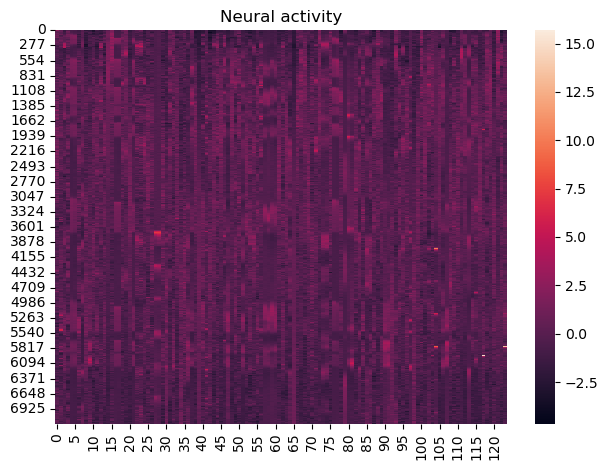

In [110]:
activeNeurons = oneWorm['neurons_mask']
neuralActivity = oneWorm['calcium_data'][:, activeNeurons]
plotHeatmap(neuralActivity, title="Neural activity")

# Autocorrelation
---

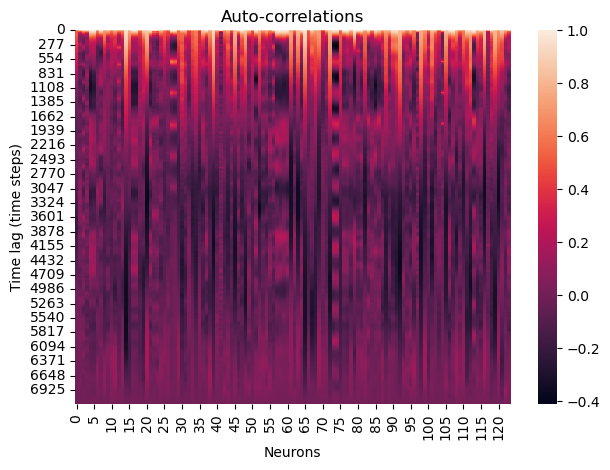

In [111]:
nlags = neuralActivity.shape[0] - 1 
autocorrelations = np.zeros((nlags+1, oneWorm['num_neurons']))
signif_mask = np.zeros((nlags+1, oneWorm['num_neurons']))

for n in range(oneWorm['num_neurons']):
    acf_result = acf(neuralActivity[:, n], nlags=nlags, alpha=0.05)

    # acf_result is a tuple, the first element is array of autocorrelation coefficients
    # the second element is a list of [lower_confidence_bound, upper_confidence_bound] lists for each lag

    # extract autocorrelations and confidence bounds
    ac = acf_result[0]
    conf_intervals = acf_result[1]

    # calculate the significant lags
    # a lag is significant if the autocorrelation at that lag is not within the confidence bounds
    for i in range(len(ac)):
        if ac[i] < conf_intervals[i][0] or ac[i] > conf_intervals[i][1]:
            signif_mask[i, n] = True
        else:
            signif_mask[i, n] = False

    autocorrelations[:, n] = ac

plotHeatmap(autocorrelations, title="Auto-correlations", xlabel="Neurons", ylabel="Time lag (time steps)")

In [112]:
np.count_nonzero(signif_mask, axis=0)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

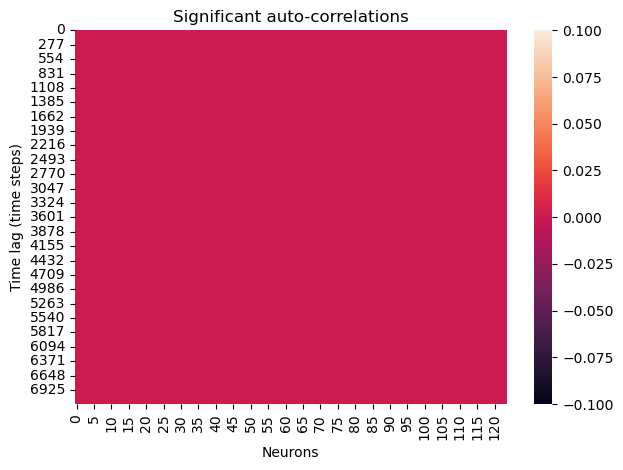

In [113]:
plotHeatmap(signif_mask, title="Significant auto-correlations", xlabel="Neurons", ylabel="Time lag (time steps)")